In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt

from simulation import *
from source import *
from aux_observation import *

In [2]:
filename_gamma = './dl2_gamma-diffuse_testing.h5'
filename_proton = './dl2_proton_testing.h5'

In [3]:
sim = simulation_object(filename_gamma, filename_proton)

In [4]:
src = source_object()

In [5]:
obs = observation(sim, src)

## Spatial Weights

In [6]:
src_disk = source_object(shape="disk")
src_ring = source_object(rmin = 0.5)
src_gauss = source_object(shape="gaussian")

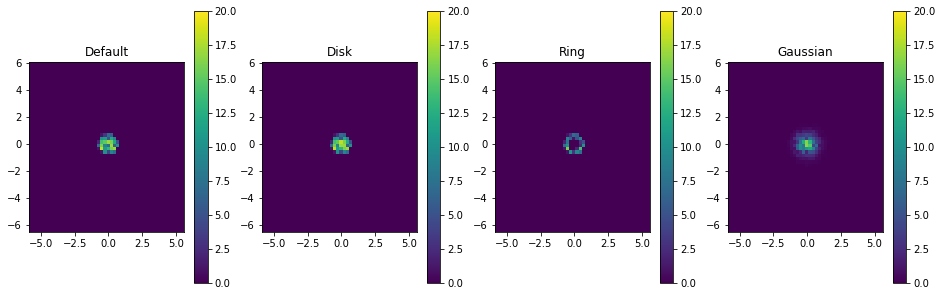

In [7]:
plt.figure(figsize=(16, 5))
plt.subplot(141, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Default')
plt.colorbar();

plt.subplot(142, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_disk.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Disk')
plt.colorbar();

plt.subplot(143, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_ring.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Ring')
plt.colorbar();

plt.subplot(144, aspect='equal')
plt.hist2d(
    sim.cam_x.to('deg').value,
    sim.cam_y.to('deg').value,
    bins=50,
    weights= src_gauss.spatial_weights(sim.cam_x,sim.cam_y),
    vmax=20
)
plt.title('Gaussian')
plt.colorbar();

## Final Weight

In [8]:
binning = [0.01, 0.01547327, 0.023942209, 0.037046426, 0.057322935, 0.088697325, 0.13724377, 0.21236099, 
        0.32859189, 0.5084391, 0.78672155, 1.2173155, 1.8835851, 2.9145222, 4.5097188, 6.9780098, 10.797263, 16.706896, 
        25.851032, 40]
src_cutoff = source_object(spectrum_parameters = src.cutoff_spectrum_parameters) 
src_powerlaw = source_object(spectrum_parameters = src.powerlaw_spectrum_parameters)
obs_disk = observation(sim, src_disk)
obs_ring = observation(sim, src_ring)
obs_gauss = observation(sim, src_gauss)
obs_cutoff = observation(sim, src_cutoff)
obs_powerlaw = observation(sim, src_powerlaw)

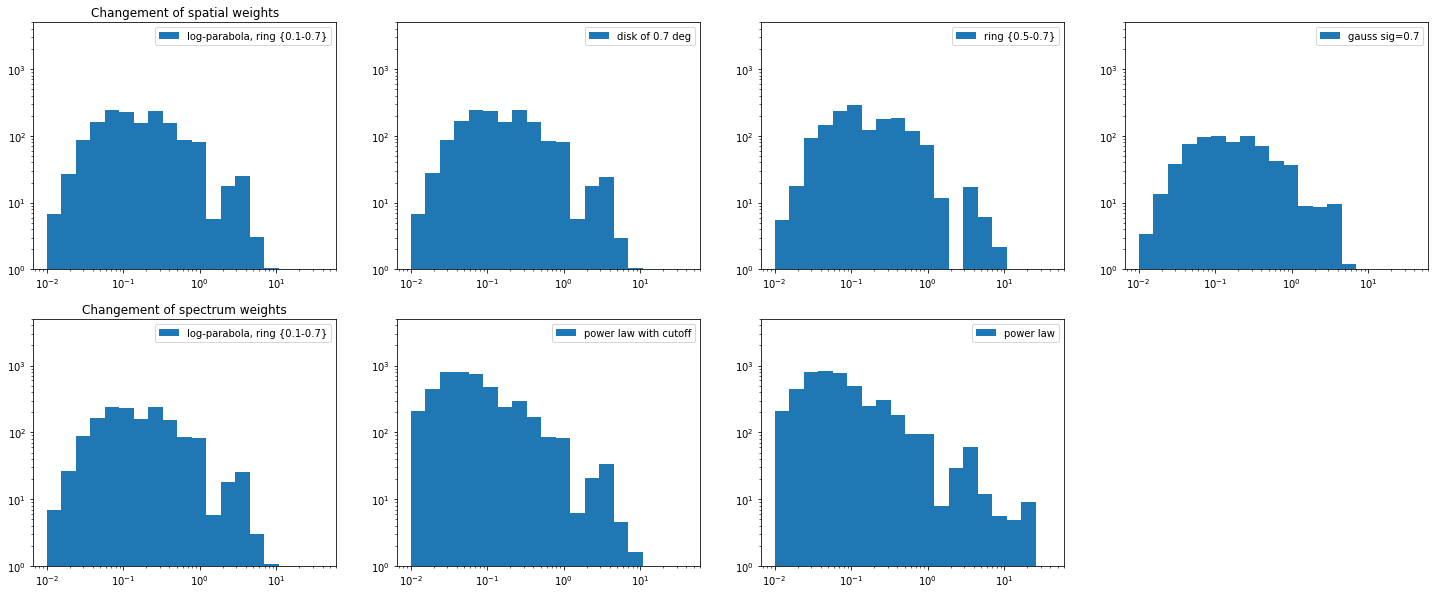

In [9]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_disk.weighting(),
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_ring.weighting(),
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_gauss.weighting(),
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs.weighting(),
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_cutoff.weighting(),
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy.to('TeV').value,
    bins= binning,
    weights= obs_powerlaw.weighting(),
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();


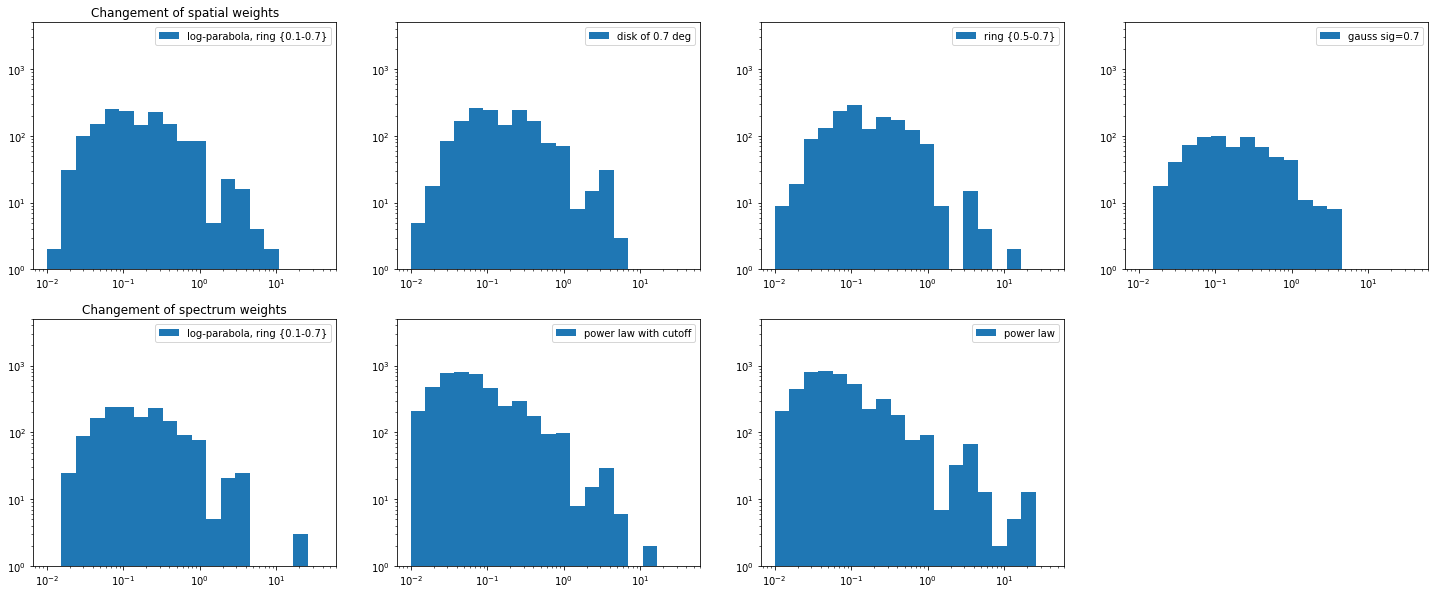

In [10]:
plt.figure(figsize=(25, 10))

plt.subplot(241)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.legend()
plt.ylim(1, 5000)
plt.title('Changement of spatial weights');

plt.subplot(242)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_disk.final_sim()['mc_energy'],
    bins= binning,
    label="disk of 0.7 deg"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(243)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_ring.final_sim()['mc_energy'],
    bins= binning,
    label="ring {0.5-0.7}"
)
plt.ylim(1, 5000)
plt.legend();


plt.subplot(244)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_gauss.final_sim()['mc_energy'],
    bins= binning,
    label="gauss sig=0.7"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(245)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="log-parabola, ring {0.1-0.7}"
)
plt.ylim(1, 5000)
plt.legend()
plt.title('Changement of spectrum weights');

plt.subplot(246)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_cutoff.final_sim()['mc_energy'],
    bins= binning,
    label="power law with cutoff"
)
plt.ylim(1, 5000)
plt.legend();

plt.subplot(247)
plt.semilogy()
plt.semilogx()
plt.hist(
    obs_powerlaw.final_sim()['mc_energy'],
    bins= binning,
    label="power law"
)
plt.ylim(1, 5000)
plt.legend();



### Data Frame of simulation data and background

In [11]:
obs.final_sim(write=True)
filename = './simulation.h5'
data = pd.read_hdf(filename, key='dl2/event/telescope/parameters/LST_LSTCam')
data

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
69,1001,467601,212.660063,2.327686,0.296555,-0.980771,1.024625,-1.277168,0.138075,0.005231,...,-0.148717,0.008313,19.102953,-0.028603,1.216419,3.142448,0,0.710159,0.000023,1.652663e+09
2595,1008,4918900,43.802698,1.641501,-0.146098,-0.183804,0.234795,-2.242392,0.070037,0.005612,...,0.230437,0.142279,3.603590,-0.150699,1.229924,3.156792,101,0.371515,0.000049,1.652663e+09
2081,1008,2009802,305.168795,2.484540,0.495194,0.259788,0.559202,0.483148,0.209675,0.005094,...,0.170087,-0.003898,3.376247,-0.133425,1.227805,3.141179,101,0.444250,0.000107,1.652663e+09
3864,1016,2015101,31.663309,1.500556,-0.182990,-0.849065,0.868560,-1.783069,0.080504,0.005201,...,-0.247445,0.003376,14.244035,0.166401,1.212893,3.141937,101,0.422833,0.000128,1.652663e+09
3004,1012,2309302,83.121493,1.919713,0.050549,-0.570417,0.572652,-1.482409,0.083179,0.005580,...,0.177016,-0.199594,8.175426,0.598007,1.227981,3.120385,101,0.432571,0.000166,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,1012,59501,429.899605,2.633367,-0.577924,-0.110172,0.588331,-2.953219,0.134888,0.003488,...,-0.252096,-0.154637,0.878869,0.054945,1.212686,3.125836,101,0.389167,0.000008,1.652664e+09
4352,1016,4841700,777.969493,2.890963,-0.591644,-0.256334,0.644787,-2.732748,0.333877,0.006936,...,-0.107401,0.088729,5.623195,0.485406,1.217881,3.150761,0,0.741944,0.000027,1.652664e+09
712,1001,4168201,111.756748,2.048274,0.383094,-0.427875,0.574315,-0.840562,0.148923,0.006458,...,-0.097874,0.187012,13.484242,0.217798,1.218174,3.160933,0,0.778333,0.000039,1.652664e+09
3568,1016,448507,1543.312927,3.188454,0.190094,0.189516,0.268425,0.783877,0.261100,0.004319,...,-0.056950,-0.145109,0.202729,0.717983,1.219660,3.126525,0,0.893833,0.000069,1.652664e+09


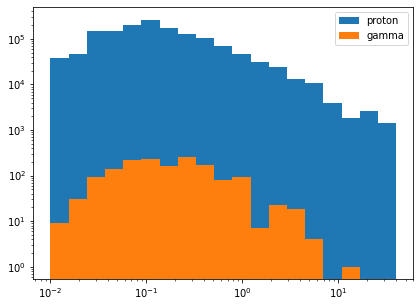

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.semilogy()
plt.semilogx()
plt.hist(
    sim.mc_energy_proton.value,
    bins= binning,
    weights = obs.background_weighting(),
    label="proton"
)
plt.hist(
    obs.final_sim()['mc_energy'],
    bins= binning,
    label="gamma"
)
plt.legend();

In [13]:
obs.final_background_sim(write=True)
name = './background.h5'
background = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
background

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
436,1014,8868505,243.464928,2.386436,0.093441,-1.013100,1.017400,-1.478824,0.694832,0.017597,...,-1.390915,-1.175512,20.511433,0.593819,1.169930,3.033961,101,0.487000,0.000085,1.652663e+09
505,1025,1568009,67.675756,1.830433,-0.462595,-0.465730,0.656429,-2.352818,0.071746,0.006560,...,-0.105253,0.003886,-15.190314,-0.199392,1.217971,3.141994,101,0.444976,0.000001,1.652663e+09
630,1025,7148406,283.562552,2.452649,0.146920,-0.680903,0.696573,-1.358282,0.109550,0.003581,...,0.307211,-0.376515,0.759872,0.388959,1.232446,3.101074,101,0.439000,0.000270,1.652663e+09
606,1025,6188107,50.745097,1.705394,-0.268878,0.882218,0.922282,1.866628,0.058778,0.003573,...,0.131795,0.636176,1.091914,-0.440071,1.225720,3.208804,101,0.273500,0.000086,1.652663e+09
193,1003,8593201,176.096812,2.245751,-0.989816,-0.287580,1.030746,-2.858838,0.079652,0.003197,...,-0.787915,-0.106927,-1.671261,0.426674,1.193572,3.131229,101,0.348417,0.000036,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
549,1025,3474303,345.390665,2.538311,0.302973,-0.744863,0.804123,-1.184485,0.213352,0.005617,...,0.599809,-0.831543,0.665480,0.540098,1.241867,3.049562,101,0.237000,0.000056,1.652664e+09
210,1003,9513506,62.218682,1.793921,0.726444,-0.319957,0.793784,-0.414877,0.071317,0.003436,...,0.157012,-0.473621,5.829776,-0.145217,1.226939,3.091400,0,0.506333,0.000313,1.652664e+09
672,1025,9298000,432.821626,2.636309,-0.270299,0.522493,0.588269,2.048208,0.403108,0.009995,...,1.727616,-0.090108,32.724516,0.250795,1.283414,3.130260,101,0.023333,0.000008,1.652664e+09
679,1025,9631303,243.645518,2.386758,0.679162,-0.503289,0.845316,-0.637745,0.599358,0.031030,...,0.345269,-1.138034,5.668582,1.514158,1.231721,3.019135,101,0.422333,0.000064,1.652664e+09


In [14]:
obs.total(write=True)
name = './dl2_LST-1.Run99999.h5'
total = pd.read_hdf(name, key='dl2/event/telescope/parameters/LST_LSTCam')
total

,obs_id,event_id,intensity,log_intensity,x,y,r,phi,length,length_uncertainty,...,reco_src_x,reco_src_y,signed_time_gradient,signed_skewness,reco_alt,reco_az,reco_type,gammaness,delta_t,dragon_time
3568,1016,448507,1543.312927,3.188454,0.190094,0.189516,0.268425,0.783877,0.261100,0.004319,...,-0.056950,-0.145109,0.202729,0.717983,1.219660,3.126525,0,0.893833,0.000051,1.652663e+09
508,1025,1689804,56.360418,1.750974,-0.895383,-0.561594,1.056929,-2.581405,0.074068,0.004111,...,-0.921539,-0.177076,1.585085,-0.136369,1.188768,3.124637,101,0.392000,0.000025,1.652663e+09
66,1003,2556106,106.211753,2.026173,0.638215,-0.913084,1.114020,-0.960765,0.117646,0.005506,...,0.255697,-0.865567,2.969793,-0.362779,1.229519,3.049117,101,0.387667,0.000148,1.652663e+09
604,1025,6057405,82.287432,1.915334,0.546785,-0.579921,0.797046,-0.814799,0.073466,0.004423,...,0.347255,-0.757159,-2.375376,0.351947,1.233094,3.059901,101,0.336833,0.000103,1.652663e+09
311,1014,3459903,38.896184,1.589907,0.125476,0.887690,0.896514,1.430375,0.043583,0.001640,...,0.442124,0.314270,7.189639,-0.301896,1.237340,3.175886,0,0.522833,0.000065,1.652663e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1003,3512304,107.467689,2.031278,0.883638,0.577690,1.055719,0.579016,0.063451,0.002889,...,0.951948,0.276677,1.855450,0.036804,1.255581,3.173452,101,0.146750,0.000024,1.652664e+09
142,1003,5988107,121.065291,2.083020,0.214534,0.192507,0.288243,0.731336,0.070054,0.002585,...,0.029297,0.457818,4.310123,0.224109,1.222409,3.189504,101,0.243167,0.000048,1.652664e+09
209,1003,9439700,101.299725,2.005608,-0.464607,0.374013,0.596444,2.463805,0.108258,0.005021,...,-0.531923,0.709337,1.455214,0.206768,1.201896,3.211886,101,0.174500,0.000025,1.652664e+09
3551,1016,367406,449.967690,2.653181,0.421620,0.336467,0.539420,0.673541,0.161864,0.004934,...,0.241739,0.075503,1.212517,0.442058,1.230354,3.149668,101,0.335000,0.000016,1.652664e+09


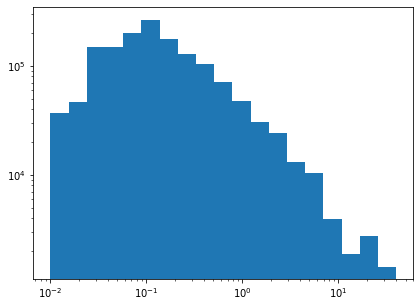

In [16]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.semilogy()
plt.semilogx()
plt.hist(
    total['mc_energy'],
    bins= binning,
);